# Kinematic Data Histograms

## Prot vs. Teff

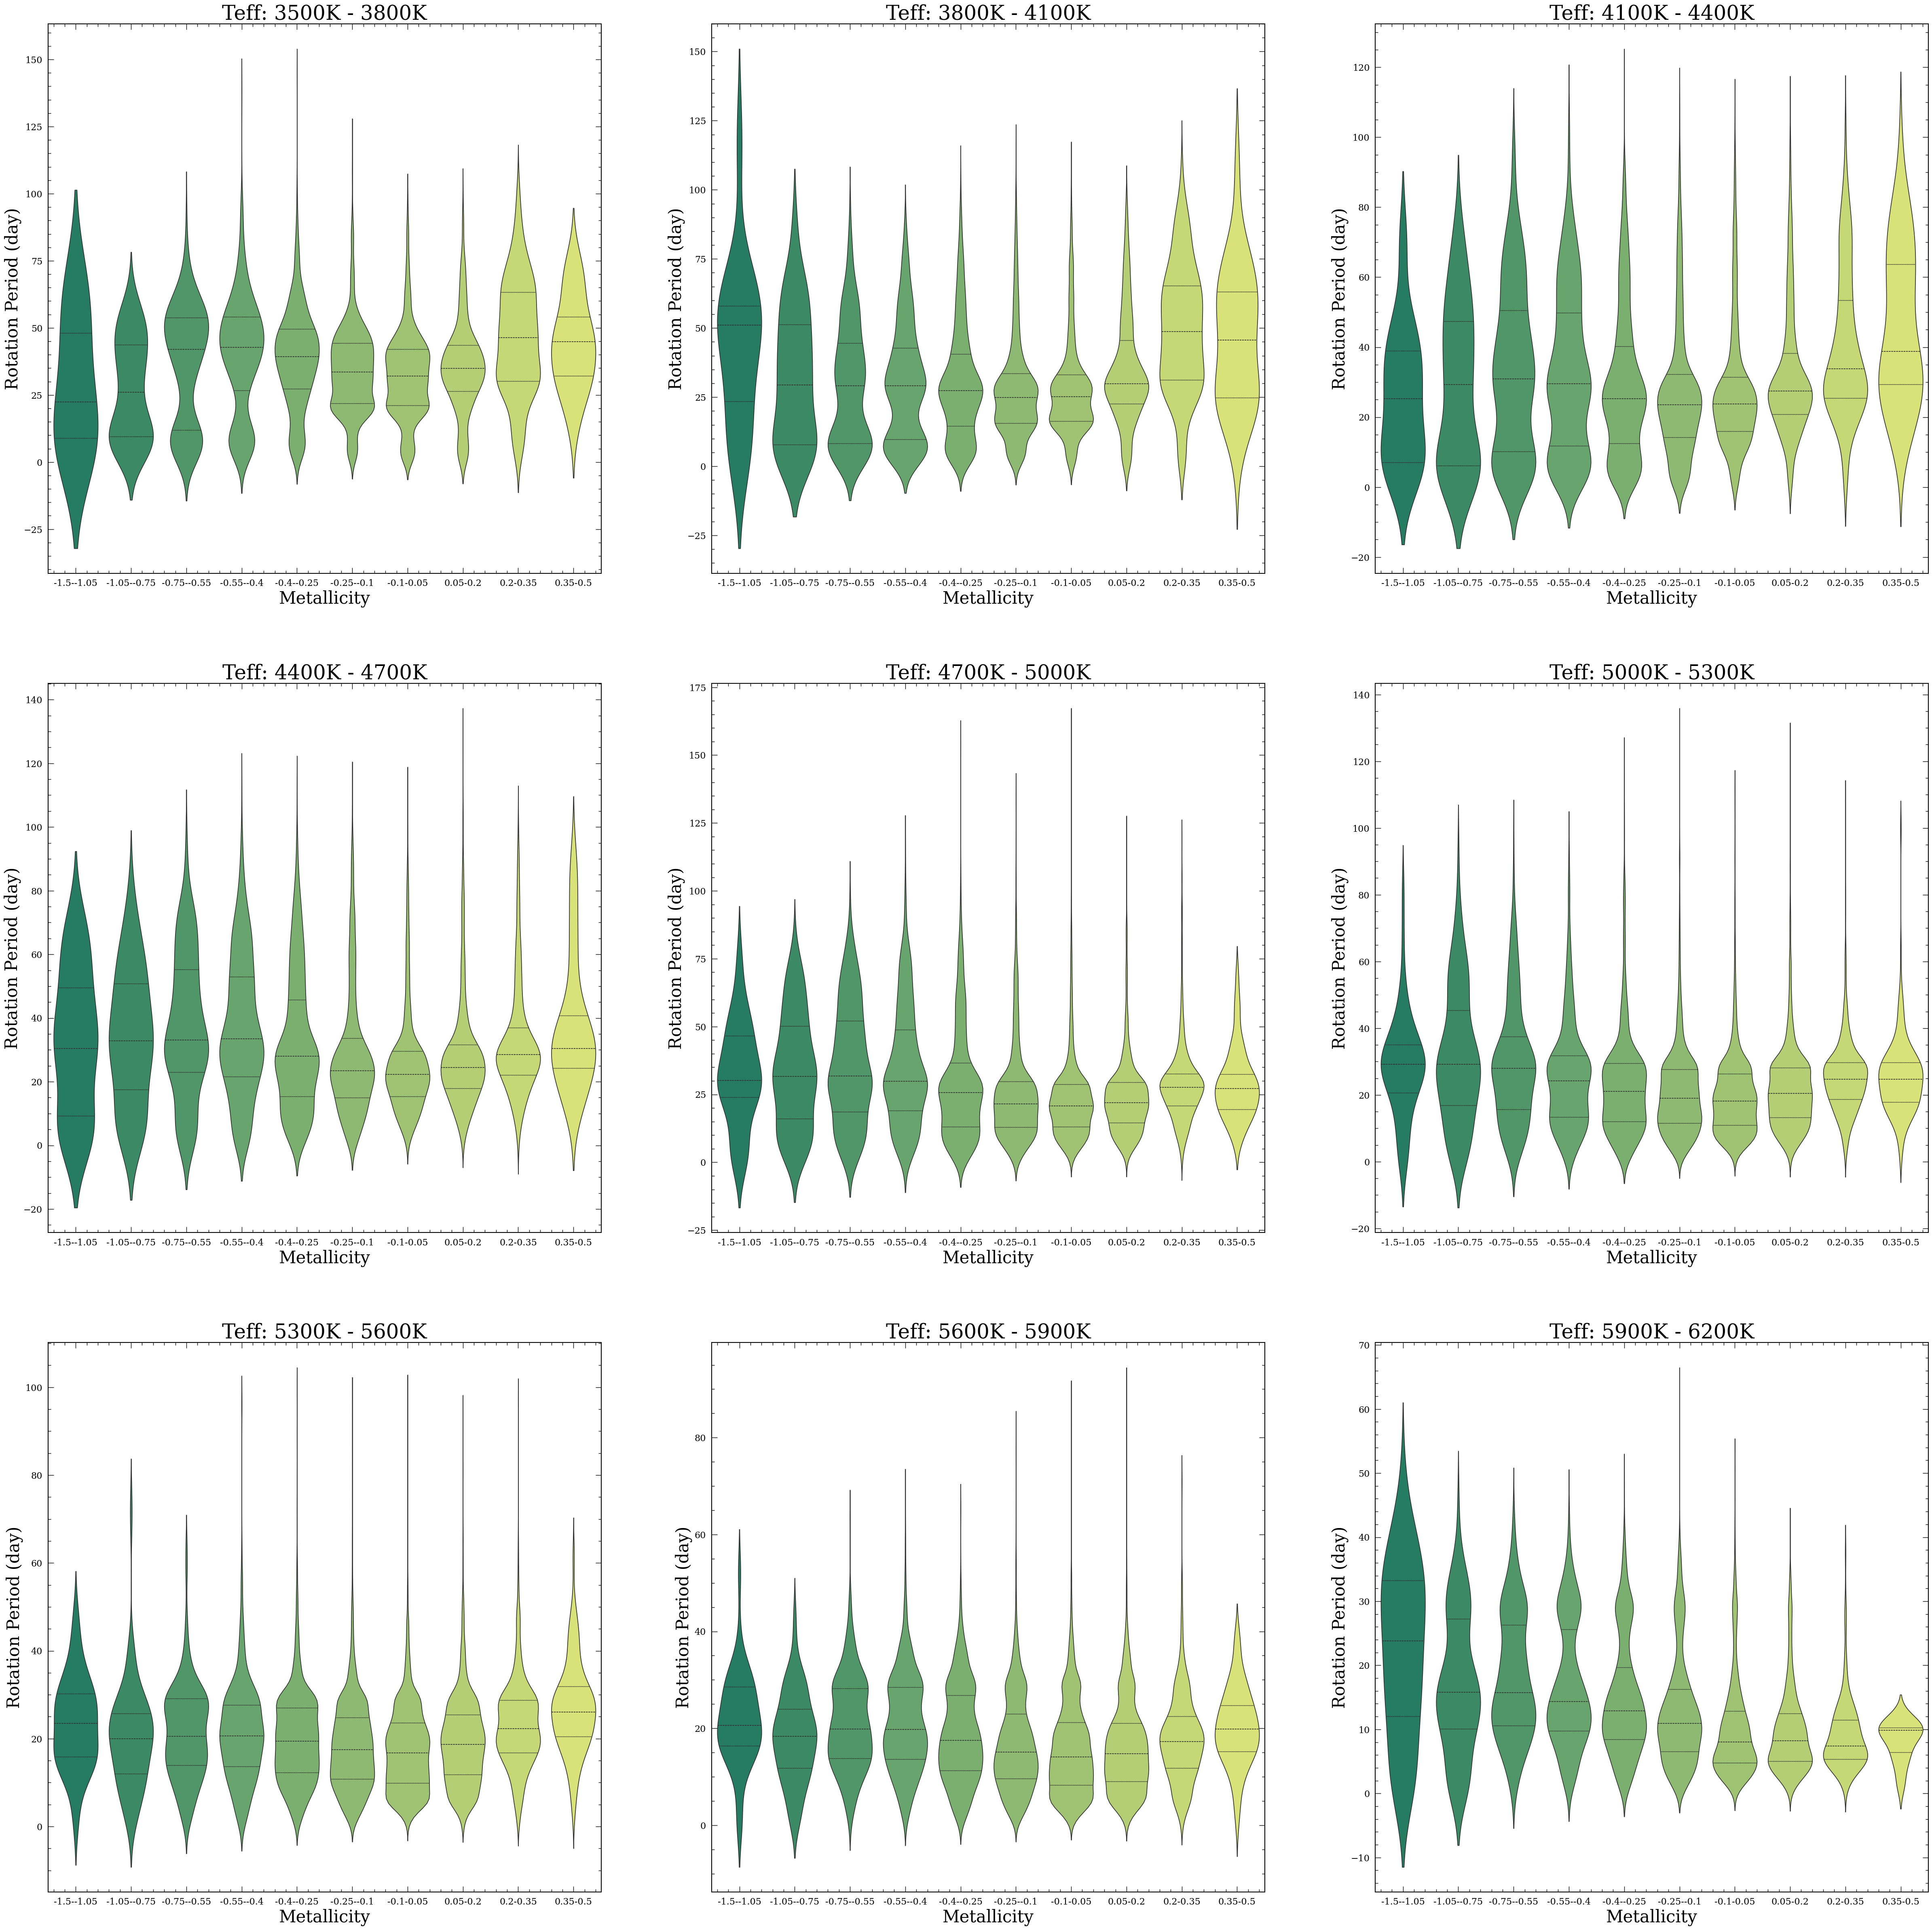

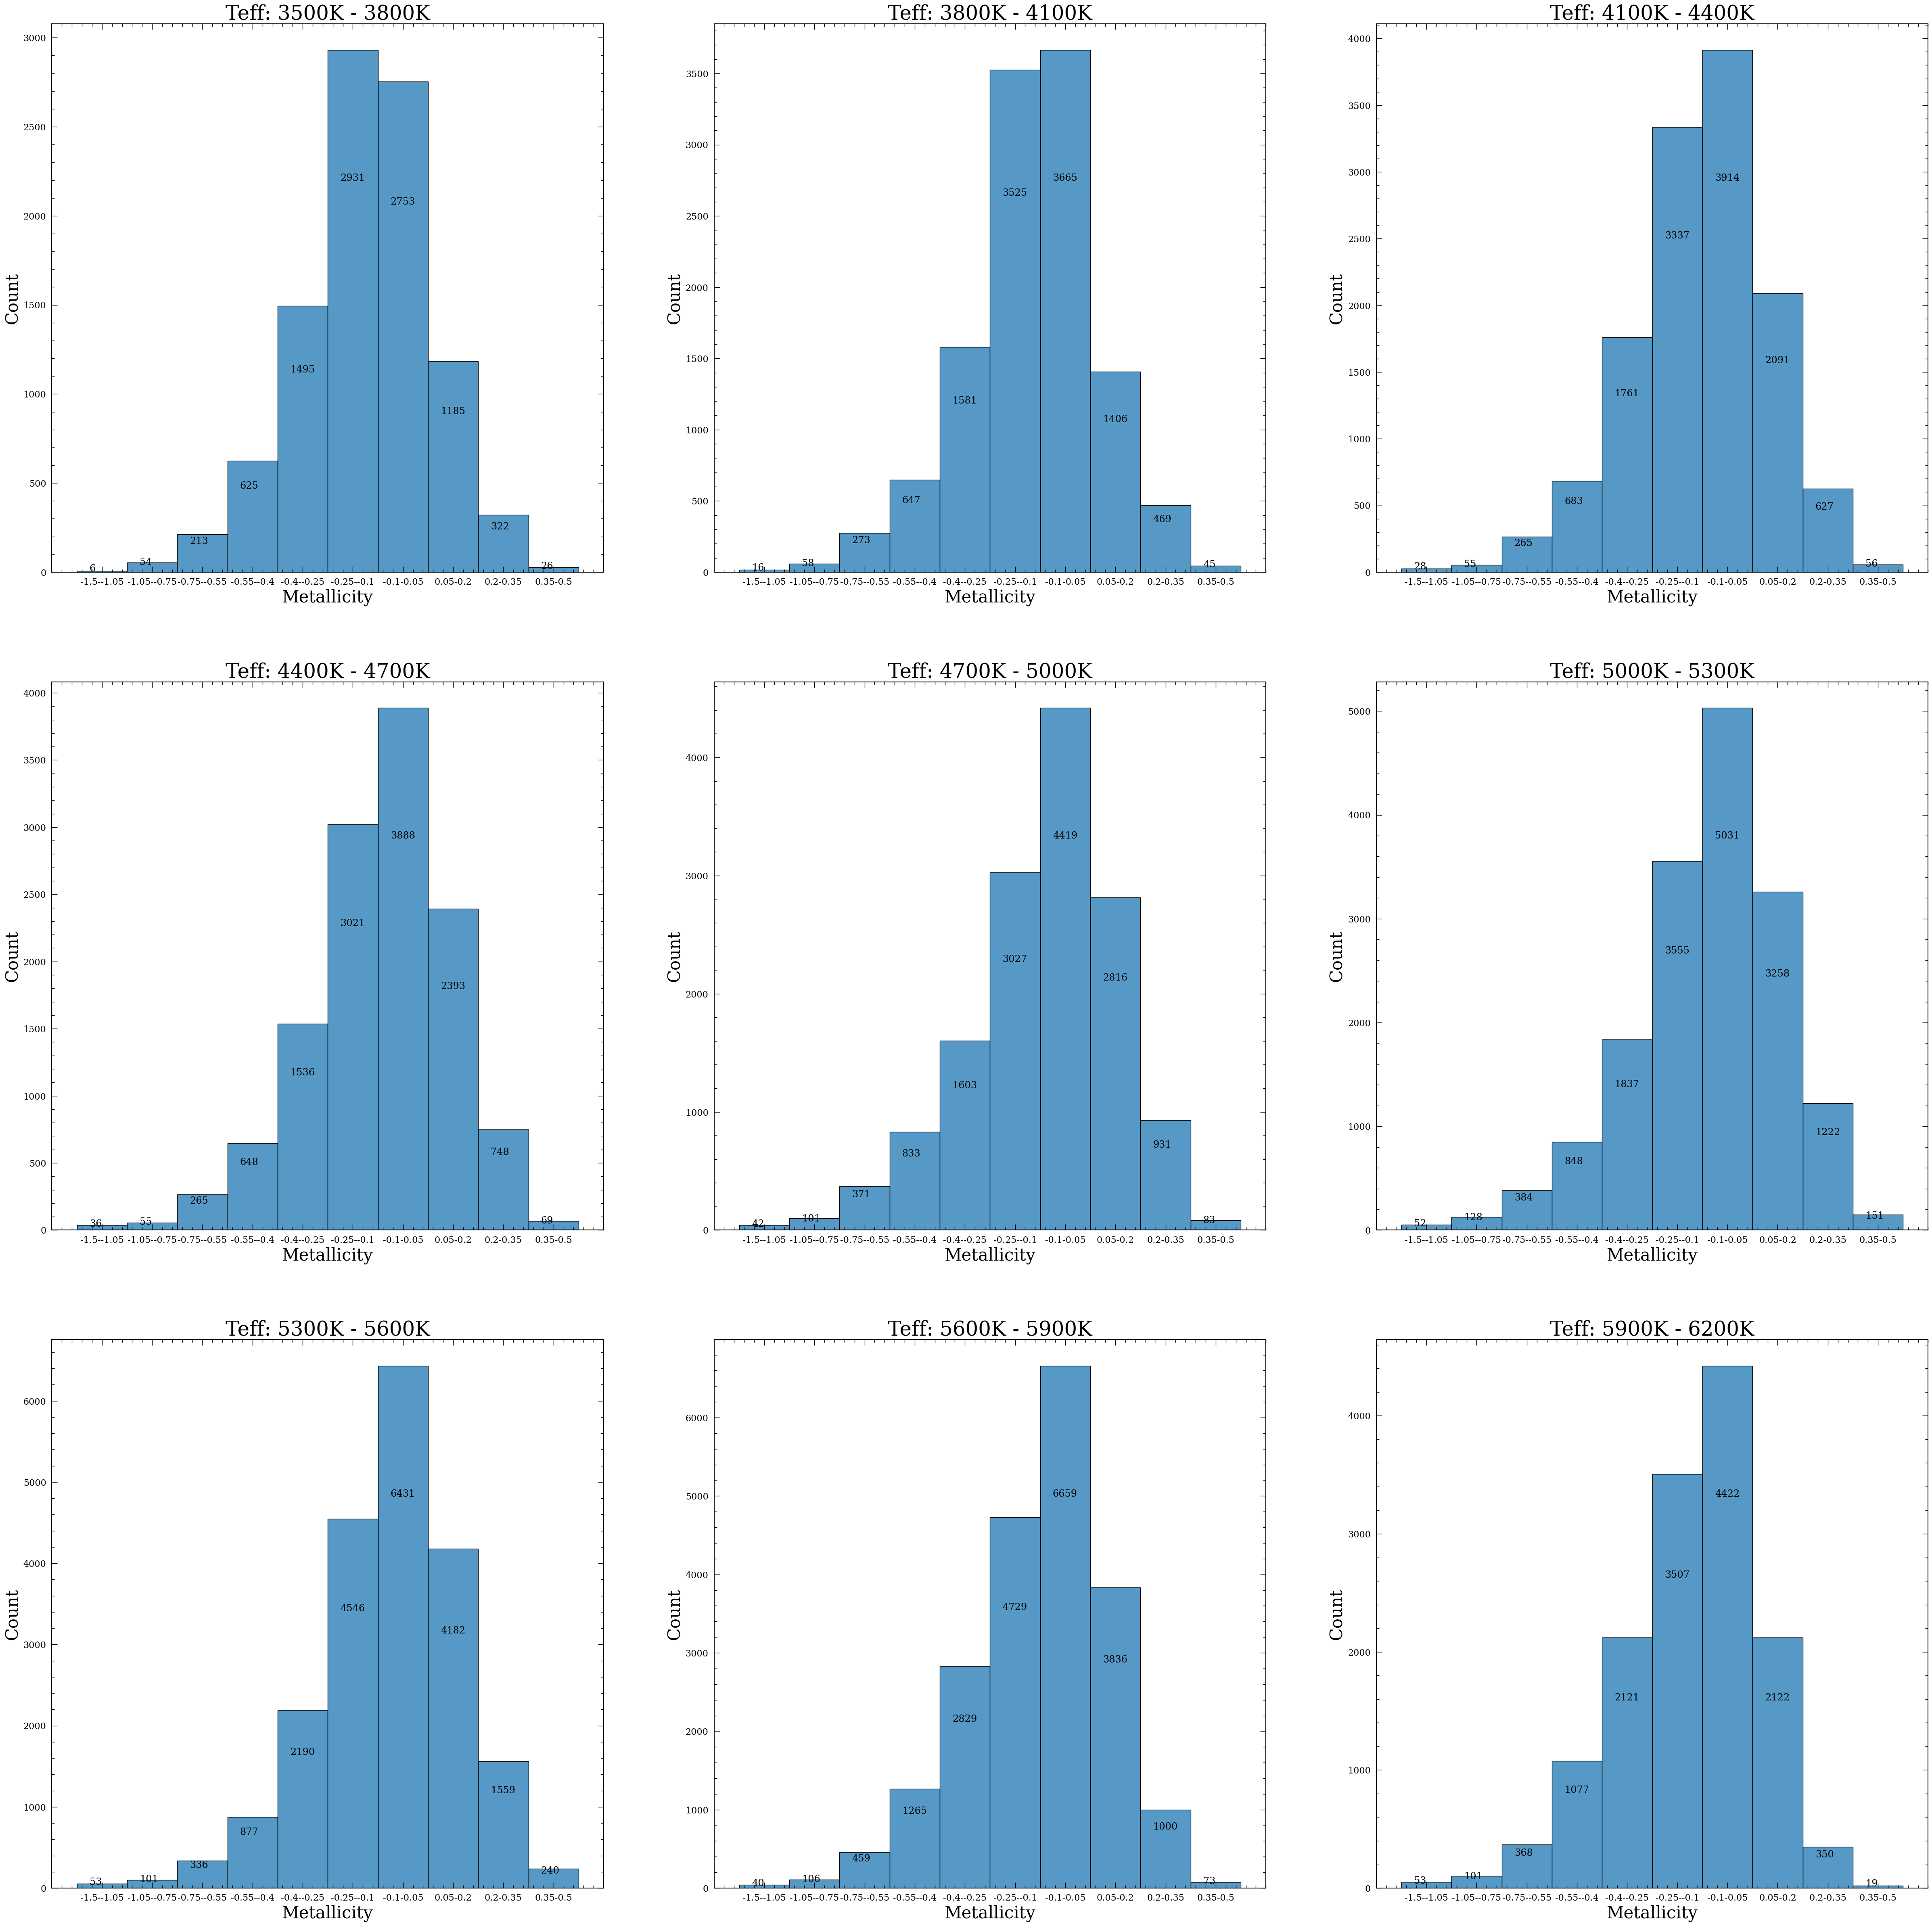

In [18]:
import matplotlib.collections
import plotting
import datamanip
import warnings
warnings.filterwarnings('ignore')
import matplotlib

plotting.plotparams()

# general parameters
csv = 'tempcsv/prot_kinematic_xgboost.csv'
y = 'Prot'
mh = 'mh_xgboost'
mhbins = (-1.5, -1.05, -0.75, -0.55, -0.40, -0.25, -0.10, 0.05, 0.20, 0.35, 0.5)
mhbinlabels = [f'{mhbins[i]}-{mhbins[i+1]}' for i in range(len(mhbins) - 1)]
palette = 'summer'
figsize=(60,60)

# graph specific parameters
x = 'teff'
teffbins = tuple(range(3500, 6201, 300))
teffbinlabels = [f'{teffbins[i]}-{teffbins[i+1]}' for i in range(len(teffbins) - 1)]
title = 'Low-Mass Stars binned by Metallicity'

df = datamanip.readcsv(csv, hue=mh, huebin=mhbins, huebinlabel=mhbinlabels)

vfig, vax = plotting.plt.subplots(nrows=3, ncols=3, figsize=figsize)
hfig, hax = plotting.plt.subplots(nrows=3, ncols=3, figsize=figsize)
for i in range(3):
    for j in range(3):
        sample = df[df[x] > teffbins[3*i + j]]
        sample = sample[sample[x] < teffbins[3*i + j + 1]]

        plotting.sns.histplot(sample, x=mh, bins=mhbins, ax=hax[i,j])
        hax[i,j].set_title(f'Teff: {teffbins[3*i + j]}K - {teffbins[3*i + j + 1]}K', fontsize=36)
        hax[i,j].set_xlabel('Metallicity')
        hax[i,j].tick_params(labelsize=16)
        bins = sample.groupby(by=mh).size().reset_index(name='counts')
        plotting.addhistcounts(hax[i,j], bins['counts'], size='xx-large', color='k')

        plotting.sns.violinplot(sample, y=y, x=mh, ax=vax[i,j], palette=palette, inner='quart')
        vax[i,j].set_title(f'Teff: {teffbins[3*i + j]}K - {teffbins[3*i + j + 1]}K', fontsize=36)
        vax[i,j].set_xlabel('Metallicity')
        vax[i,j].tick_params(labelsize=16)
        vax[i,j].set_ylabel('Rotation Period (day)')

vfig.show()
vfig.savefig('plots/histograms/violinplots.png')
hfig.show()
hfig.savefig('plots/histograms/counts.png')
